Start with the necessary imports and reading the datasets of github. The datasets can be combined using the `concat()` function:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

dataset91 = pd.read_csv('https://raw.githubusercontent.com/kraikisto/CERN_LEP_Z_boson/main/hadron_short91_f1_000.csv.gz',index_col=False)
dataset92 = pd.read_csv('https://raw.githubusercontent.com/kraikisto/CERN_LEP_Z_boson/main/hadron_short92_e2_000.csv.gz',index_col=False)
dataset93 = pd.read_csv('https://raw.githubusercontent.com/kraikisto/CERN_LEP_Z_boson/main/hadron_short93_d2_000.csv.gz',index_col=False)
dataset94 = pd.read_csv("C:/Users/kalle/Jupyter/CERN_LEP_Z_boson_github/hadron_short94_c2_000.csv.gz",index_col=False) #too big for github
dataset = pd.concat([dataset91, dataset92, dataset93, dataset94]) 
dataset.head() #sometimes gives memory error (although could have been because I performed other heavy operations)

,NRUN,IEVT,ECM,NJETS,E1,P1,PT1,PX1,PY1,PZ1,...,2.72,51.00,48.11,17.88,9.71,15.01,44.67,1.00,0.38,1.00.1
0,20620.0,3486.0,91.25,3.0,38.12,37.68,36.85,12.59,-34.63,7.86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20621.0,3.0,91.25,4.0,30.46,29.74,26.51,10.06,-24.53,-13.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20621.0,7.0,91.25,2.0,27.27,26.55,21.37,-21.26,-2.10,15.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20621.0,39.0,91.25,3.0,43.55,41.68,28.10,-28.05,-1.60,-30.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20621.0,53.0,91.25,3.0,22.65,21.21,21.14,13.78,-16.03,-1.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The goal of this exercise is to find a particle using invariant mass. This can be done by checking which invariant masses are produced by the particle accelerator. If there area a lot of datapoints for a specific invariant mass that means there's a particle. Since the dataset does not have invariant mass, we have to calculate it ourselves. If we try to do that, we first notice an error caused by mistakes in the data. After some tests we see that there are some values of PZ1 with the value `**********`. First we remove those from the dataset and then change the datatype of the values to float64 since the values were saved as strings. 

Now using the fixed dataset we can calculate the invariant mass using the formula: 

$$
Mc^2 = \sqrt{(E_1 + E_2)^2 - c^2 (\vec{p}_1 + \vec{p}_2)^2 }
$$

To simplify the calculations we can use natural units where $c=1$. If you just do this the program will give you a warning about negative values in the dataset. Due to measurement error some values will in fact be negative. Sinve they are caused by measurement error they are all quite small and will just be removed for now. 

In [2]:
dataset = dataset[dataset.PZ1 != '**********'] #removes datapoints where PZ1 is **********
dataset = dataset.astype({'PZ1': 'float64'}) #convert the strings to flouts for the upcoming calculations

#removing negative values:
dataset = dataset.drop(dataset[(dataset.E1 + dataset.E2)**2 - (dataset.PX1 + dataset.PX2)**2 - (dataset.PZ1 + dataset.PZ2)**2 - (dataset.PY1 + dataset.PY2)**2 < 0].index)

#calculating invariant mass:
dataset["M"] = np.sqrt((dataset.E1 + dataset.E2)**2 - (dataset.PX1 + dataset.PX2)**2 - (dataset.PZ1 + dataset.PZ2)**2 - (dataset.PY1 + dataset.PY2)**2)
dataset.head()

,NRUN,IEVT,ECM,NJETS,E1,P1,PT1,PX1,PY1,PZ1,...,51.00,48.11,17.88,9.71,15.01,44.67,1.00,0.38,1.00.1,M
0,20620.0,3486.0,91.25,3.0,38.12,37.68,36.85,12.59,-34.63,7.86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.310964
1,20621.0,3.0,91.25,4.0,30.46,29.74,26.51,10.06,-24.53,-13.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.577305
2,20621.0,7.0,91.25,2.0,27.27,26.55,21.37,-21.26,-2.10,15.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.942703
3,20621.0,39.0,91.25,3.0,43.55,41.68,28.10,-28.05,-1.60,-30.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.295970
4,20621.0,53.0,91.25,3.0,22.65,21.21,21.14,13.78,-16.03,-1.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.239506


Now let's plot the histogram of the invariant mass values. We should see it spike where around the Z bosons invariant mass:

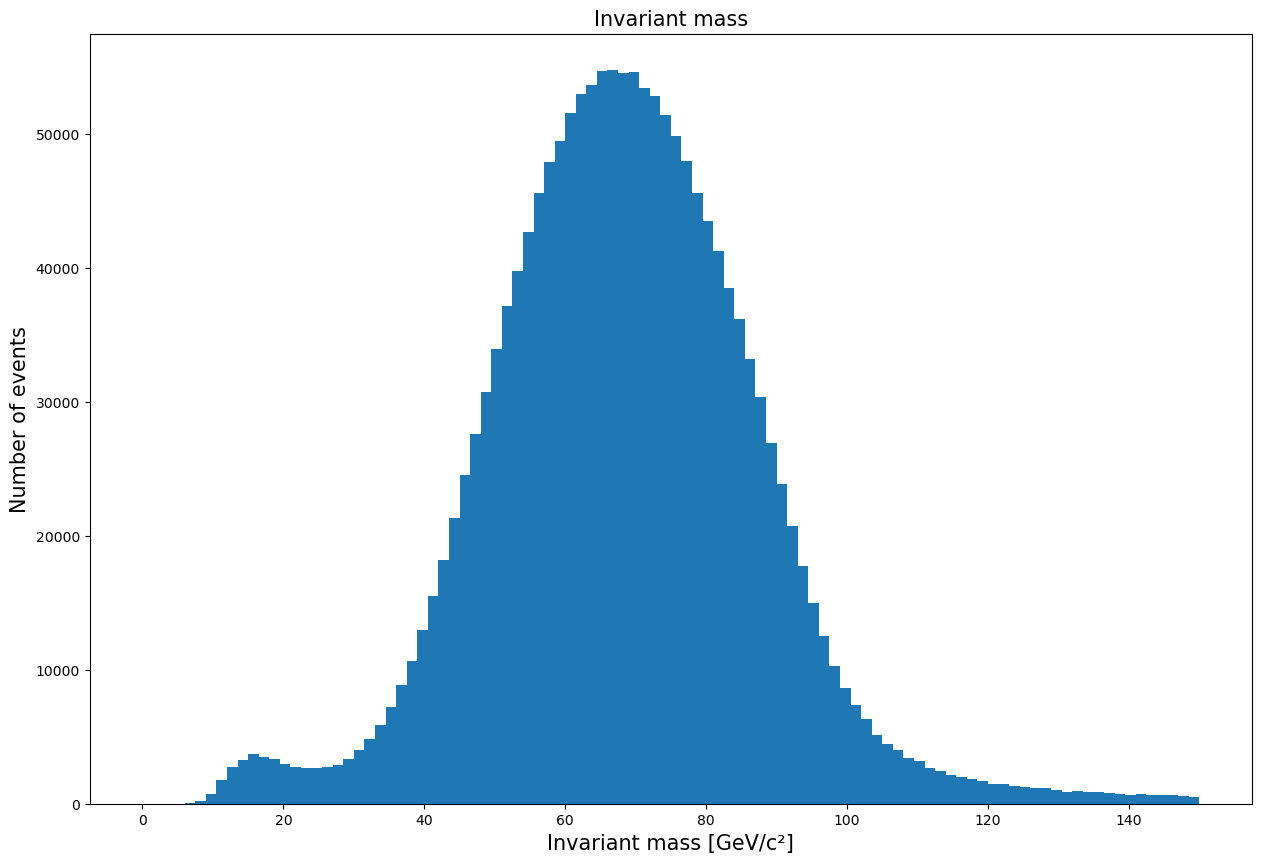

In [3]:
lowerlimit = 0
upperlimit = 150
bins = 100


fig = plt.figure(figsize=(15, 10))
plt.hist(dataset.M, bins=bins, range=(lowerlimit, upperlimit))

plt.xlabel('Invariant mass [GeV/c²]', fontsize=15)
plt.ylabel('Number of events', fontsize=15)
plt.title('Invariant mass', fontsize=15) 

plt.show()

Now that we have the histogram we can start analysing it. There is a peak (often called a resonance) at around 60 GeV. This peak signifies a particle. We can actually get more from this histogram. This is done by plotting what is called a Breit-Wigner function on the histogram. Breit-Wigner distribution is of the following form:

$$
f(E) = \dfrac{k}{(E^2 - M^2)^2 + M^2 \Gamma^2} 
$$

where $k = \dfrac{2\sqrt{2}M \Gamma \gamma}{\pi\sqrt{M^2 + \gamma}}$ with $\gamma = \sqrt{M^2(M^2 + \Gamma^2)}$ which are in natural units $\hbar = c = 1$. 


Let's start with the simple parts of the fitting. First we limit ourselves to the area around where we know the particle is by setting limits to the mass values and remove the rest from the dataset. Then we set the initial guesses. In this fit there are 5 variables. We can guess that the max values is the peak we saw in the histogram. The rest we can guess and if the plot isn't good try again.

In [4]:
#limit to where Z-boson should be:
lowerlimit = 30
upperlimit = 110
bins = 50

#Change the dataset to be only that area
limitedmasses = dataset[(dataset.M > lowerlimit) & (dataset.M < upperlimit)]
histogram = plt.hist(limitedmasses.M, bins=bins, range=(lowerlimit,upperlimit), density = True) 
plt.close() #stop from showing the plot

#Initial guesses:
initials = [50, 60, 0, 2, 4]

Next step is to create the fit. First we define a function that matches the form of the Breit-Wigner function given earlier. We can actually get the (x,y) coordinates of the histogram easily since we saved it in the previous cell. Then we fit this function into those values using `curve_fit()` from the `scipy.optimize` library. Let's also save the best values and covariance that the fitting gives us. 

In [5]:
from scipy.optimize import curve_fit


def breitwigner(E, gamma, M, a, b, A):
    return a*E+b+A*( (2*np.sqrt(2)*M*gamma*np.sqrt(M**2*(M**2+gamma**2)))/(np.pi*np.sqrt(M**2+np.sqrt(M**2*(M**2+gamma**2)))) )/((E**2-M**2)**2+M**2*gamma**2)

#Histogram as an object consists of 2 lists: List of the heights of the bars and the edges of the bins
#Using normal list operations we can use the histogram to get x and y coordinates:
y = histogram[0] #gives the height of each bar in a list
x = 0.5*(histogram[1][0:-1] + histogram[1][1:]) #list of midpoints of a bins

#Fits the defined Breit-Wigner function to the (x,y) points gotten from the histogram
best, covariance = curve_fit(breitwigner, x, y, p0=initials, sigma=np.sqrt(y)) #sigma is the magnitude of the uncertainty in y-data

Lastly we plot both this fitted function and the histogram into the same picture. We can also print the best values and their limits of error, which can be easily calculated from the covariance. 

The values and the uncertainties from the optimization:

The value of the decay width = 59.20796685080565 +- 2.1284432686026613
The value of the maximum of the distribution = 66.7151607470734 +- 0.3632637229999615
a = 0.00016728740209743023 +- 1.0992080928356523e-05
b = -0.025575864539632922 +- 0.001714380522659667
A = 2.88991455897349 +- 0.13300974857142295


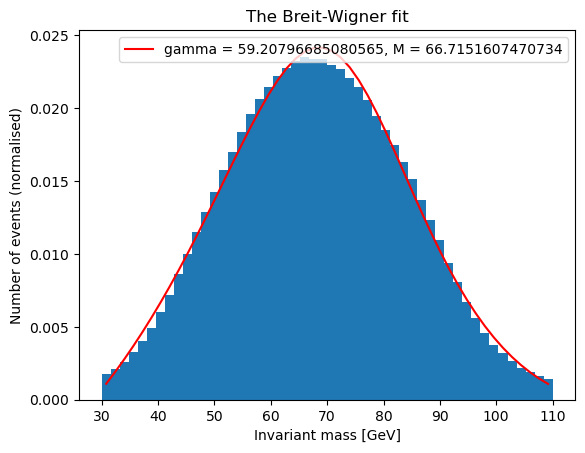

In [6]:
#Covariance is is determined using the sigma given. The diagonal elements are the variances.
error = np.sqrt(np.diag(covariance))
    
#Parameters and their errors from optimization:
print("The values and the uncertainties from the optimization:")
print("")
print("The value of the decay width = {} +- {}".format(best[0], error[0]))
print("The value of the maximum of the distribution = {} +- {}".format(best[1], error[1]))
print("a = {} +- {}".format(best[2], error[2]))
print("b = {} +- {}".format(best[3], error[3]))
print("A = {} +- {}".format(best[4], error[4]))

#plot both graphs:
plt.hist(limitedmasses.M, bins=bins, range=(lowerlimit,upperlimit), density = True)
plt.plot(x, breitwigner(x, *best), 'r-', label='gamma = {}, M = {}'.format(best[0], best[1]))
plt.xlabel('Invariant mass [GeV]')
plt.ylabel('Number of events (normalised)')
plt.title('The Breit-Wigner fit')
plt.legend()
plt.show()

The other peak:

The values and the uncertainties from the optimization:

The value of the decay width = 21.249108696195425 +- 4.3628207724741515
The value of the maximum of the distribution = 13.575877192255259 +- 0.8599676979415329
a = 0.007290358740354402 +- 0.0016567653895021516
b = -0.1765433912322224 +- 0.056957121239990534
A = 2.7987212677171263 +- 0.9570660273960402


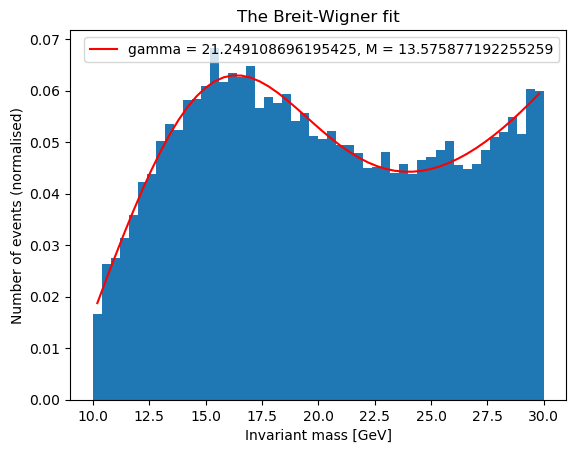

In [7]:
#limit to where Z-boson should be:
lowerlimit = 10
upperlimit = 30
bins = 50

#Change the dataset to be only that area
limitedmasses = dataset[(dataset.M > lowerlimit) & (dataset.M < upperlimit)]
histogram = plt.hist(limitedmasses.M, bins=bins, range=(lowerlimit,upperlimit), density = True) 
plt.close() #stop from showing the plot

#Initial guesses:
initials = [5, 20, 0, 2, 4]



from scipy.optimize import curve_fit


def breitwigner(E, gamma, M, a, b, A):
    return a*E+b+A*( (2*np.sqrt(2)*M*gamma*np.sqrt(M**2*(M**2+gamma**2)))/(np.pi*np.sqrt(M**2+np.sqrt(M**2*(M**2+gamma**2)))) )/((E**2-M**2)**2+M**2*gamma**2)

#Histogram as an object consists of 2 lists: List of the heights of the bars and the edges of the bins
#Using normal list operations we can use the histogram to get x and y coordinates:
y = histogram[0] #gives the height of each bar in a list
x = 0.5*(histogram[1][0:-1] + histogram[1][1:]) #list of midpoints of a bins

#Fits the defined Breit-Wigner function to the (x,y) points gotten from the histogram
best, covariance = curve_fit(breitwigner, x, y, p0=initials, sigma=np.sqrt(y)) #sigma is the magnitude of the uncertainty in y-data


#Covariance is is determined using the sigma given. The diagonal elements are the variances.
error = np.sqrt(np.diag(covariance))
    
#Parameters and their errors from optimization:
print("The values and the uncertainties from the optimization:")
print("")
print("The value of the decay width = {} +- {}".format(best[0], error[0]))
print("The value of the maximum of the distribution = {} +- {}".format(best[1], error[1]))
print("a = {} +- {}".format(best[2], error[2]))
print("b = {} +- {}".format(best[3], error[3]))
print("A = {} +- {}".format(best[4], error[4]))

#plot both graphs:
plt.hist(limitedmasses.M, bins=bins, range=(lowerlimit,upperlimit), density = True)
plt.plot(x, breitwigner(x, *best), 'r-', label='gamma = {}, M = {}'.format(best[0], best[1]))
plt.xlabel('Invariant mass [GeV]')
plt.ylabel('Number of events (normalised)')
plt.title('The Breit-Wigner fit')
plt.legend()
plt.show()